<a href="https://colab.research.google.com/github/Angeles-velez/regula/blob/main/Regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de Regresión logística


## Pipeline de Machine Learning


*   **Generación del Dataset**: Crear un dataset para clasificación
*   **Preprocesamiento:** Preparar los datos para el modelo.
*   **División de Datos:** Separar los datos en conjuntos de entrenamiento y prueba.
*   **Entrenamiento del Modelo:** Ajustar el modelo a los datos de entrenamiento.
*   **Evaluación del Modelo:** Medir el rendimiento del modelo con datos de prueba.
*   **Predicción:** Usar el modelo entrenado para clasificar nuevos datos.

## Fundamentos Teóricos y Matemáticos de la Regresión Logística

### Panorama General
La regresión logística es una técnica estadística ampliamente utilizada para resolver problemas de clasificación binaria. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística estima la probabilidad de que una instancia pertenezca a una de dos categorías utilizando una función no lineal llamada **función sigmoide**.

---

### La Función Sigmoide

En el núcleo de la regresión logística se encuentra la función **sigmoide**, que transforma cualquier número real en un valor dentro del intervalo (0, 1):

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Donde:**
- \( \sigma(z) \): valor de salida de la función sigmoide, representa una probabilidad.
- \( e \): número de Euler (~2.718), base de los logaritmos naturales.
- \( z \): combinación lineal de las variables de entrada y sus respectivos coeficientes.

La variable \( z \) se define como:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

**Donde:**
- \( \beta_0 \): término independiente o sesgo (bias).
- \( \beta_i \): coeficiente asociado a la variable \( x_i \).
- \( x_i \): valor de la i-ésima característica (feature) del conjunto de entrada.
- \( n \): número total de variables independientes (features).

---

### Representación del Modelo

El modelo de regresión logística estima la probabilidad de que la variable de salida \( Y \) sea igual a 1, dado un conjunto de características \( X \):

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^{n} \beta_i x_i)}}
$$

Y, como complemento:

$$
P(Y = 0 \mid X) = 1 - P(Y = 1 \mid X)
$$

Aquí, \( P(Y = 1 \mid X) \) es la **probabilidad condicional** de pertenecer a la clase positiva (1), mientras que \( P(Y = 0 \mid X) \) es la probabilidad de pertenecer a la clase negativa (0).

---

### Forma Logit

Reformulando el modelo en términos del **logit** (logaritmo del cociente de probabilidades), obtenemos:

$$
\log \left( \frac{P(Y=1 \mid X)}{1 - P(Y=1 \mid X)} \right) = \beta_0 + \sum_{i=1}^{n} \beta_i x_i
$$

**Nota:**  
- La expresión dentro del logaritmo se conoce como **odds** o razón de probabilidades.
- El logaritmo natural de los odds se llama **logit**.

---

### Estimación de los Coeficientes

Los parámetros \( \beta \) del modelo se estiman utilizando el principio de **máxima verosimilitud**. La función de verosimilitud para un conjunto de \( m \) observaciones es:

$$
L(\beta) = \prod_{i=1}^{m} \sigma(z_i)^{y_i} \left(1 - \sigma(z_i)\right)^{1 - y_i}
$$

**Donde:**
- \( m \): número total de ejemplos (observaciones) en los datos.
- \( y_i \): etiqueta real de la observación \( i \) (0 o 1).
- \( \sigma(z_i) \): salida del modelo para la observación \( i \).

Para facilitar los cálculos, se suele utilizar la **log-verosimilitud**:

$$
\ell(\beta) = \sum_{i=1}^{m} \left[ y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right]
$$

Esta función se optimiza numéricamente mediante:
- **Gradiente descendente** (Gradient Descent), o
- **Método de Newton-Raphson**, dependiendo del problema.

---



##Importar librerías necesarias

In [1]:
# importación de librerías
import numpy as np  # operaciones matemáticas y arrays
import pandas as pd  # manipulación y análisis de dataframes
import matplotlib.pyplot as plt  # gráficos
import seaborn as sns  # gráficos
from sklearn.datasets import load_iris  # cargar el dataset Iris
from sklearn.model_selection import train_test_split  # dividir datos en train/test

# modelo de machine learning
from sklearn.linear_model import LogisticRegression  # algoritmo de regresión logística

# métricas de evaluación
from sklearn.metrics import (
    accuracy_score,  # calcula la precisión global del modelo
    confusion_matrix,  # muestra aciertos y errores por clase
    classification_report  # genera reporte detallado (precision, recall, f1-score)
)

##1. Cargar el dataset

Cargar un dataset sintético para clasificación utilizando `iris` de `scikit-learn`. E imprimimos parte del dataset para verlo.

In [2]:
# cargar el dataset
iris = load_iris()

# crear un dataframe para inspeccionar los datos
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['especies'] = iris.target_names[iris.target] #añadir columna de especies

# mostrar dataframe
display(iris_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


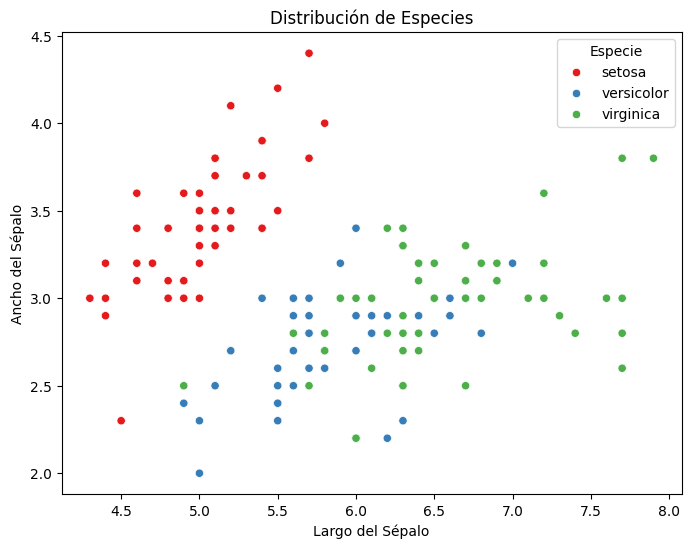

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df,
                x='sepal length (cm)',
                y='sepal width (cm)',
                hue='especies',
                palette='Set1')
plt.title("Distribución de Especies")
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.legend(title="Especie")
plt.show()


##Preprocesamiento

Si es necesario, se escalan los datos.
En este caso no lo es porque el dataset ya está limpio.
Creamos un pairplot para ver las relaciones entre variables, así como una matriz de correlación y su respectivo heatmap.

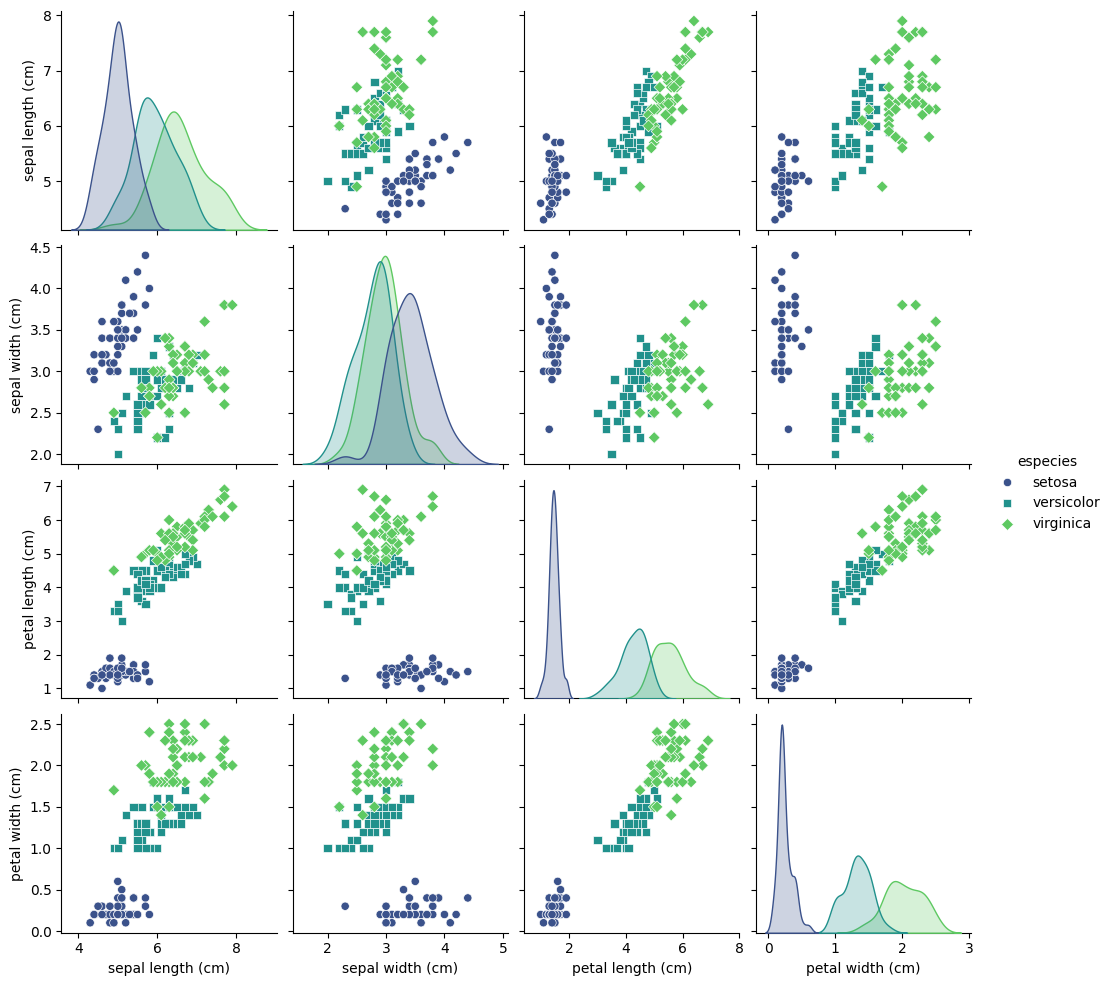

In [4]:
# crear pairplot
sns.pairplot(iris_df, hue='especies', palette='viridis', markers=['o', 's', 'D'])
plt.show()

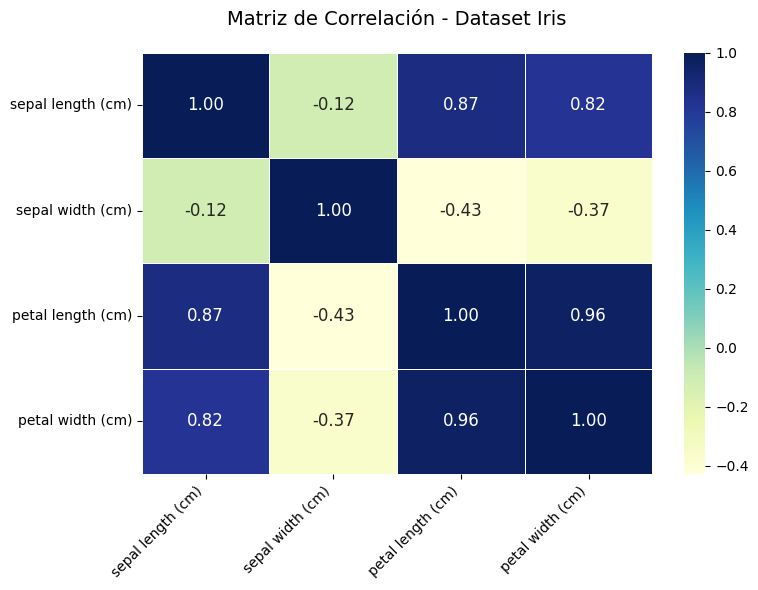

In [5]:
# calcular matriz de correlación
corre_ma = iris_df.corr(numeric_only=True)

# crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corre_ma,
            annot=True,
            cmap='YlGnBu',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 12})

plt.title('Matriz de Correlación - Dataset Iris', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


La diagonal principal tiene valores 1 (correlación perfecta de una variable consigo misma)

Las correlaciones más fuertes en el dataset iris son:

*   petal length (cm) y petal width (cm) (≈0.96)
*   petal length (cm) y sepal length (cm) (≈0.87)



##División de datos

# Utilizamos la función train_test_split para separar el dataset en dos subconjuntos:
* `X`: Las características del dataset.
* `y`: Las etiquetas del dataset.
* `test_size`: El porcentaje de datos que se utilizarán para prueba (en este caso, 20%).
* `random_state`: Semilla para reproducibilidad.

La función devuelve cuatro arrays:

* `X_train`: Características de entrenamiento.
* `X_test`: Características de prueba.
* `y_train`: Etiquetas de entrenamiento.
* `y_test`: Etiquetas de prueba.


In [10]:
# Cargar el dataset Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123  #semilla para reproducibilidad
)

# Mostrar tamaños de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} ')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} ')
print(f'\nDistribución de clases en entrenamiento: {np.bincount(y_train)}')
print(f'Distribución de clases en prueba: {np.bincount(y_test)}')

Tamaño del conjunto de entrenamiento: 120 
Tamaño del conjunto de prueba: 30 

Distribución de clases en entrenamiento: [37 44 39]
Distribución de clases en prueba: [13  6 11]


##Entrenamiento del modelo
Para el rntrenamiento del Modelo, utilizamos LogisticRegression de scikit-learn para entrenar el modelo

In [ ]:
# creación y entrenamiento del modelo
model = LogisticRegression(
    penalty='l2',           # regularización L2 (ridge)
    C=1.0,                 # fuerza de regularización inversa
    solver='lbfgs',        # algoritmo para problemas multiclase
    max_iter=100,          # máximo de iteraciones
)

model.fit(X_train, y_train)

# resultados
print("Coeficientes por clase:\n", model.coef_)
print("\nInterceptos por clase:", model.intercept_)
print("\nNúmero de iteraciones realizadas:", model.n_iter_[0])

##Evaluación del modelo
Evaluación del Desempeño del Modelo
Para medir cómo se comporta el modelo, usamos dos métricas clave:

Precisión (accuracy): porcentaje de predicciones correctas sobre el total.

Matriz de confusión: permite visualizar los aciertos y errores por clase.

###Comentarios sobre el Dataset Iris
La precisión obtenida es elevada, ya que:

Se trata de un dataset balanceado y de tamaño reducido.

Las variables como longitud y ancho de los pétalos ofrecen una clara separación entre clases.

La clase setosa es fácilmente identificable debido a sus características únicas.

Aunque puede haber cierto traslape entre versicolor y virginica, el uso conjunto de las 4 variables facilita que un modelo como la regresión logística aprenda límites efectivos entre ellas.

**Accuracy**

In [ ]:
y_pred = model.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

**Confusion Matrix**

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Classification Report**

Reporte de Clasificación: Significado y Ejemplo de Cada Métrica
Precision (Precisión):
De todas las flores que el modelo clasificó como "setosa", ¿qué proporción realmente pertenece a esa clase? Indica la exactitud en las predicciones positivas.

Recall (Sensibilidad o Exhaustividad):
De todas las flores que son realmente "setosa", ¿cuántas el modelo logró identificar correctamente? Mide la capacidad de detectar verdaderos positivos.

F1-score:
Es la media armónica entre Precision y Recall. Proporciona una única métrica balanceada, especialmente útil cuando hay clases desbalanceadas.

Support (Soporte):
Número total de muestras reales que pertenecen a cada clase en el conjunto de prueba (por ejemplo, 13 flores setosa).

Macro avg (Promedio Macro):
Promedio simple de las métricas calculadas para cada clase, sin importar el tamaño de la clase.

Weighted avg (Promedio Ponderado):
Promedio de las métricas considerando el número de muestras por clase, para reflejar mejor el impacto de clases más frecuentes.









In [ ]:
print(classification_report(y_test, y_pred,
                          target_names=iris.target_names))

##Predicciones
Finalmente, usamos el modelo entrenado para clasificar nuevos datos.

In [ ]:
# datos de ejemplo para predecir (formato: [sepal_length, sepal_width, petal_length, petal_width])
nuevas_flores = [[5.1, 3.5, 1.4, 0.2],
                 [6.7, 3.0, 5.2, 2.3]]

# hacer predicción
predicciones = model.predict(nuevas_flores)

# mostrar resultados
print("Predicciones:", predicciones)
print("Clases predichas:", [iris.target_names[p] for p in predicciones])

##Conclusión
La regresión logística es un algoritmo fundamental en tareas de clasificación debido a su simplicidad y efectividad. Aunque se basa en un modelo lineal, su aplicación de la función sigmoide le permite predecir probabilidades de pertenencia a cada clase. Además, al incorporar técnicas de regularización como L1 y L2, ayuda a prevenir el sobreajuste y mejorar la generalización del modelo.